<br>


## <center> E-COMMERCE CUSTOMER SEGMENTATION  

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
DATA=pd.read_excel('C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/Final/data/Project/cust_data.xlsx')

In [3]:
df=DATA.copy()

In [4]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
df.isnull().sum()


Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [8]:
df.duplicated().sum()

0

Handling NAN values

In [9]:
df["Gender"].value_counts()

Gender
F    22054
M     5222
Name: count, dtype: int64

In [10]:
# #per record gender is a categorial data so fill with mode()
# df["Gender"].mode()[1]

In [11]:
df["Gender"]= df["Gender"].fillna("Unspecified")

In [12]:
df["Gender"].value_counts()

Gender
F              22054
M               5222
Unspecified     2724
Name: count, dtype: int64

In [13]:
df["Gender"].count()

30000

In [14]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [15]:
df["Gender"].value_counts()

Gender
F              22054
M               5222
Unspecified     2724
Name: count, dtype: int64

To see which gender has high percentage of online percentage

C:\Users\Aishwarya MMPL\AppData\Local\Temp\ipykernel_8504\2244362851.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j+1,i,f"{percentage[i]:.2f}%")


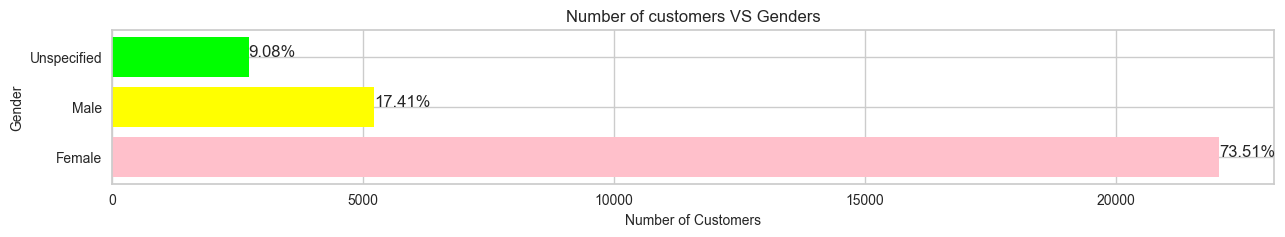

In [16]:
gen= df["Gender"].value_counts()
plt.figure(figsize=(15,2))
color = ['pink', 'yellow', 'lime']
plt.barh(["Female","Male","Unspecified"],gen,color=color)
plt.title("Number of customers VS Genders")
plt.xlabel('Number of Customers', fontsize=10)
plt.ylabel('Gender',fontsize=10)
percentage = gen * 100 / len(df.Gender)
for i,j in enumerate(gen):
    plt.text(j+1,i,f"{percentage[i]:.2f}%")
plt.show()

From this plot we can see more no of orders were placed by Female with Percentage of 73.51%.

In [17]:
df["Orders"].value_counts()

Orders
0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: count, dtype: int64

C:\Users\Aishwarya MMPL\AppData\Local\Temp\ipykernel_8504\3884530373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x="Orders",palette="Spectral")


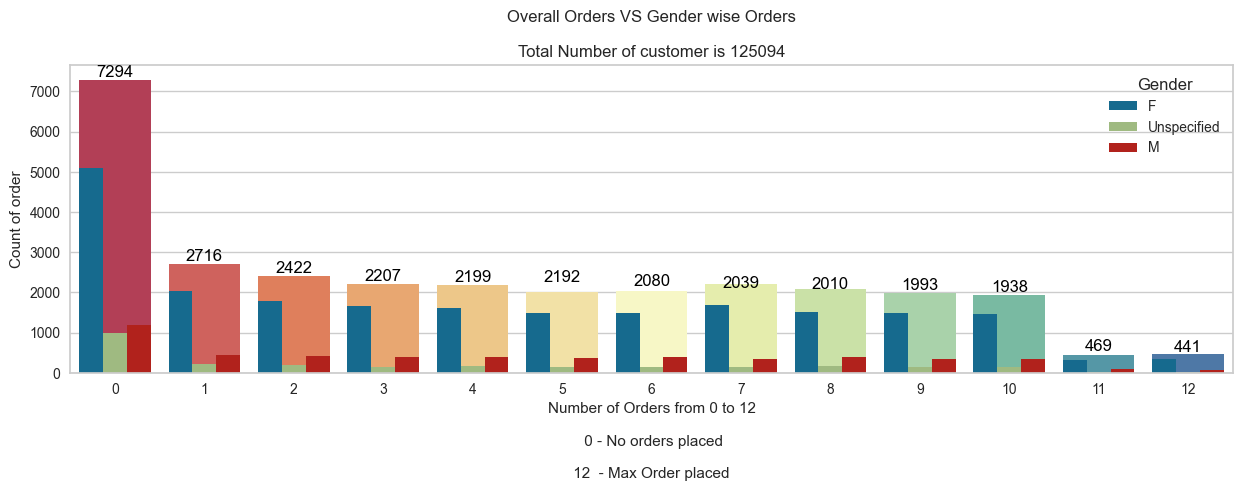

In [18]:
total = df["Orders"].value_counts()
plt.figure(figsize=(15,4))
plt.title(f"Overall Orders VS Gender wise Orders\n\nTotal Number of customer is {df["Orders"].sum()}")
ax=sns.countplot(df,x="Orders",palette="Spectral")
plt.xlabel('Number of Orders from 0 to 12\n\n 0 - No orders placed\n\n 12  - Max Order placed ')
plt.ylabel('Count of order')

for i,j in enumerate(total):
    plt.text(i,j,str(j),va='bottom',ha='center', color='black')
sns.countplot(data=df,x='Orders',hue='Gender')
plt.show()


In [19]:
df1= df.copy()
df1["Total_order"]=df1.iloc[:,3:].sum(axis=1)
data= df1.sort_values("Total_order",ascending=False)[:10]

In [20]:
df.sort_values("Orders",ascending=False)[:10]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
16255,16256,F,12,0,0,0,1,1,0,1,...,0,1,1,0,0,0,0,0,0,0
6821,6822,F,12,1,0,0,0,0,0,0,...,0,3,3,1,0,0,0,0,0,0
3529,3530,F,12,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6819,6820,M,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3178,3179,F,12,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
15502,15503,F,12,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12697,12698,F,12,0,1,0,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
13239,13240,F,12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1512,1513,F,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24007,24008,F,12,3,0,0,0,1,1,2,...,0,1,0,1,0,1,0,0,0,0


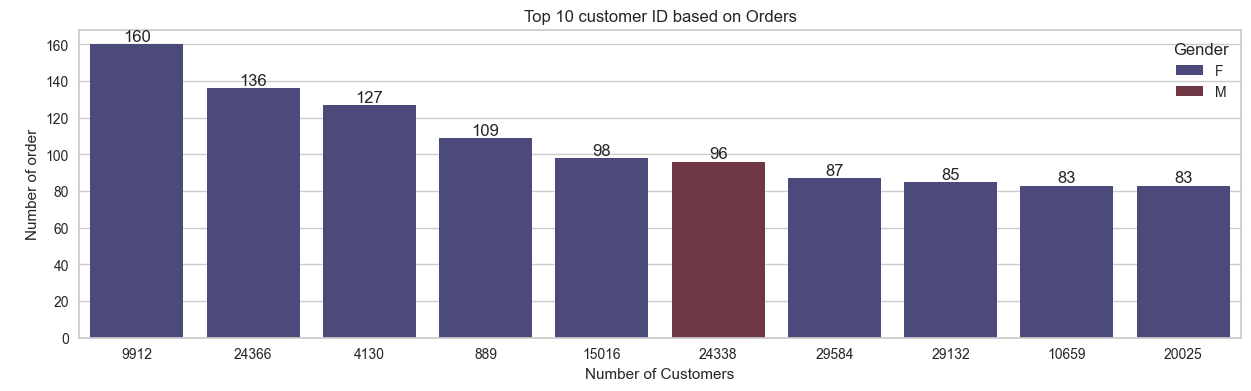

In [21]:
plt.figure(figsize=(15,4))
plt.title("Top 10 customer ID based on Orders")
axes=sns.barplot(data,x="Cust_ID",y="Total_order",palette="icefire",hue="Gender",order=data.sort_values("Total_order",ascending=False).Cust_ID)
plt.xlabel('Number of Customers', fontsize=11)
plt.ylabel('\nNumber of order', fontsize=11)
for i in axes.containers:
    axes.bar_label(i)

From top 10 chart represents Female placed more no of orders of 160 under cust_no 9912 and per records shows Females are placing more orders compare to male.

<Axes: >

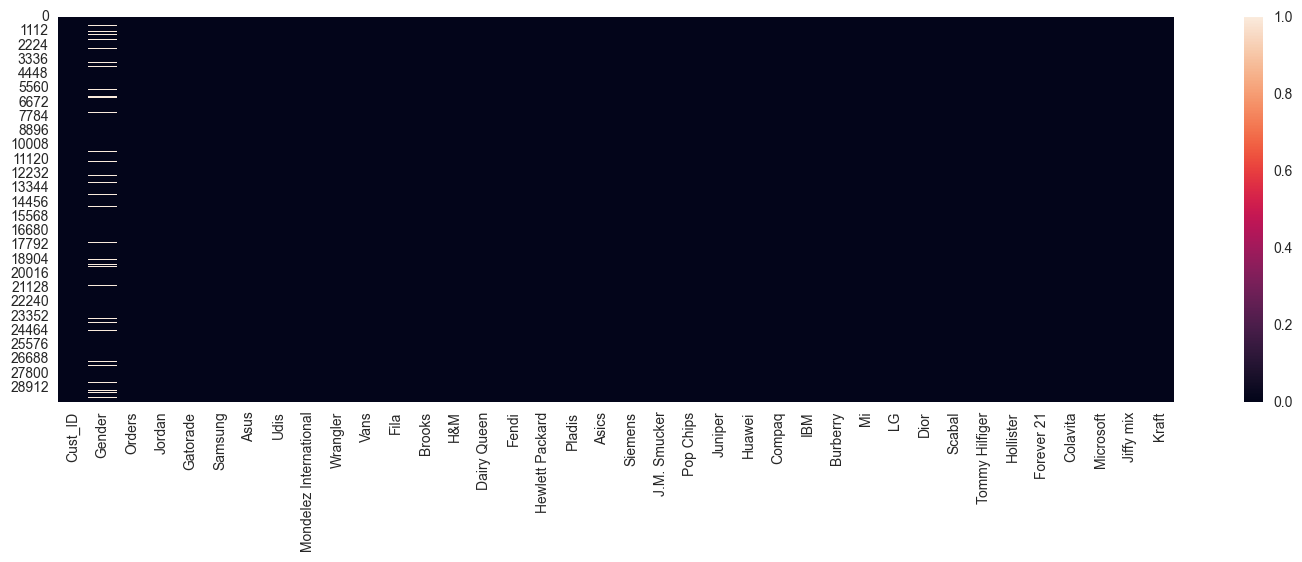

In [22]:
plt.figure(figsize=(18,5))
sns.heatmap(DATA.isnull())

<Axes: >

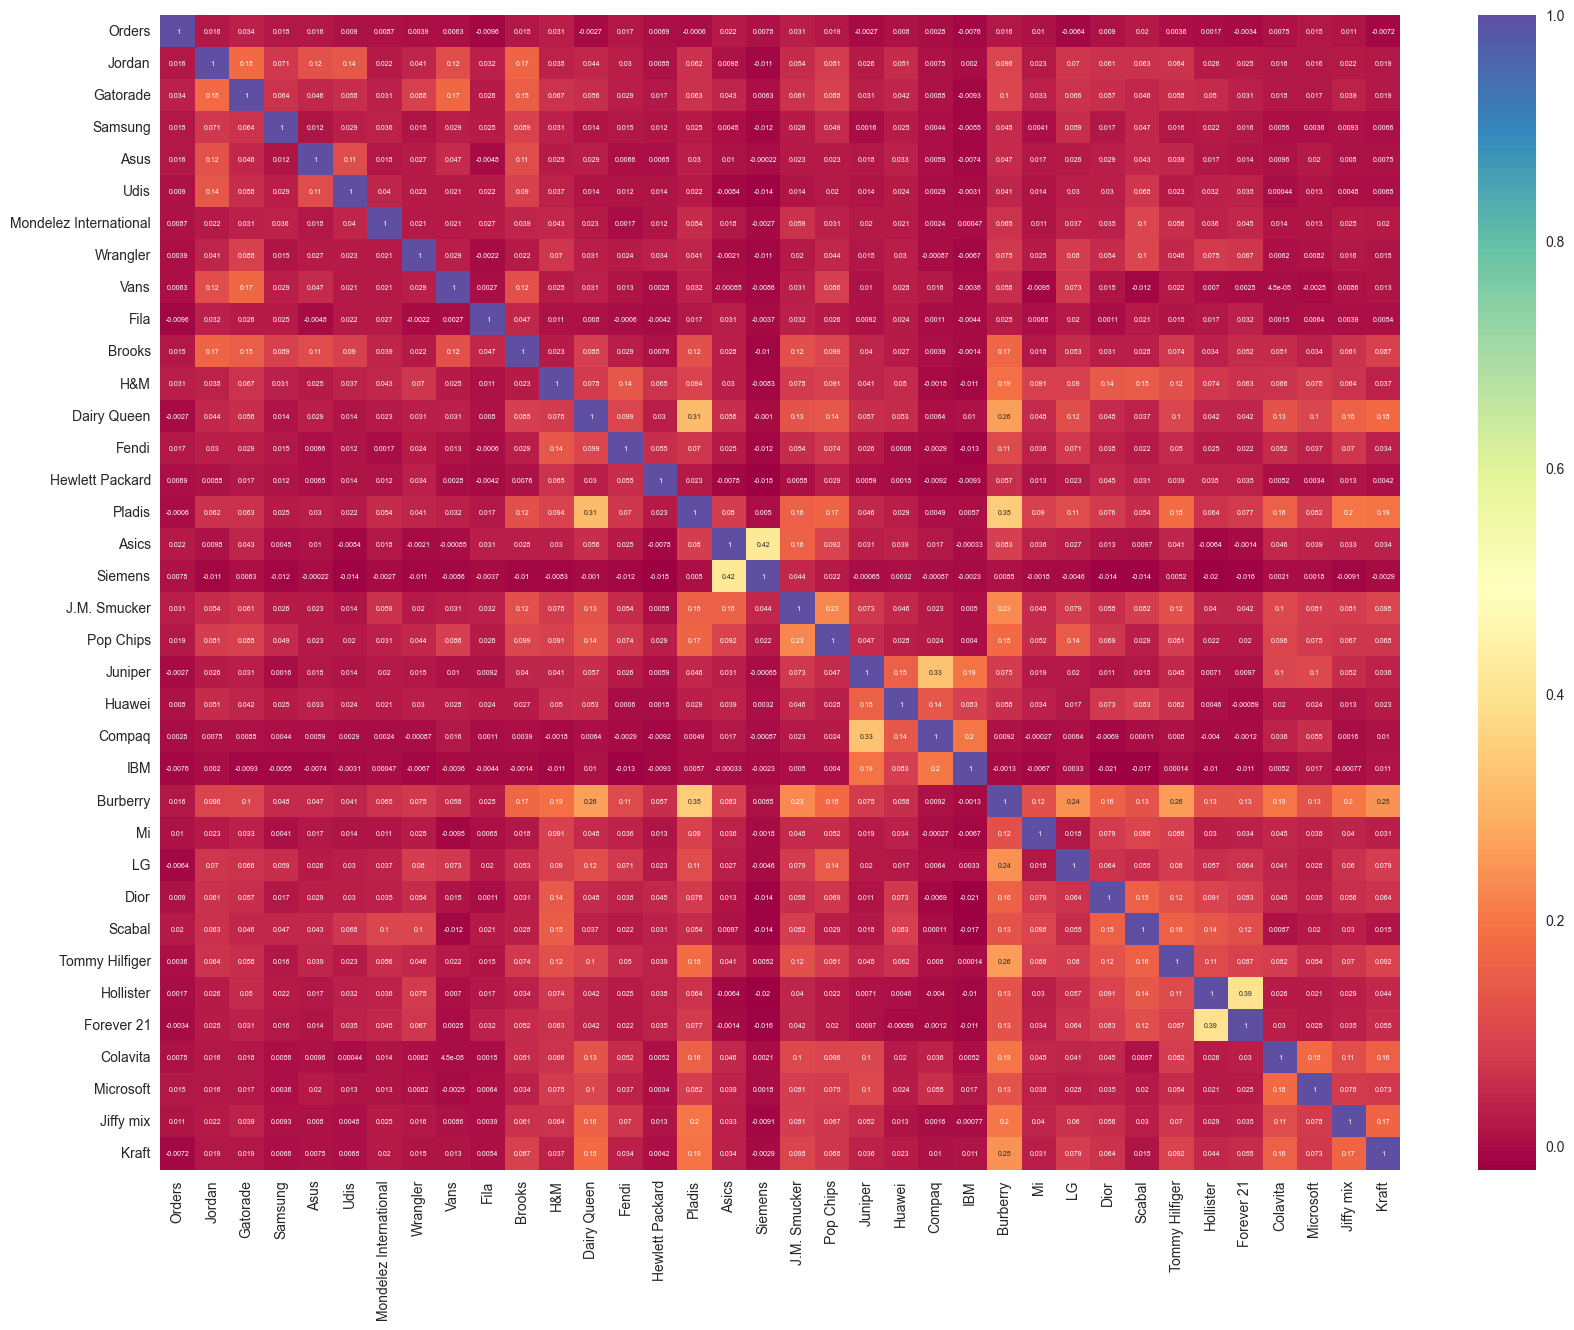

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,2:].corr(),cmap="Spectral", annot=True,annot_kws={'size':5})

In [24]:
dummy= pd.get_dummies(df,columns=['Gender'])    

In [25]:
dummy

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Gender_Unspecified
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,False,True,False
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,False,True,False
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
4,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False
29996,29997,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False
29997,29998,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False



**DATA CLEANING**

In [26]:
box=dummy.drop(columns=['Gender_M','Gender_F','Gender_Unspecified'],axis=1)
box.isnull().sum()

Cust_ID                   0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [33]:
def Box_plot(col):
    plt.figure(figsize=(18,18))
    for index,col in enumerate(col,1):# 1 strating index
        x=plt.subplot(7,6,index)
        box.boxplot(column=col,ax=x)
        plt.tight_layout()
        plt.title(col) 
plt.show()

In [34]:
col=list(box.columns[:])
len(col)

37

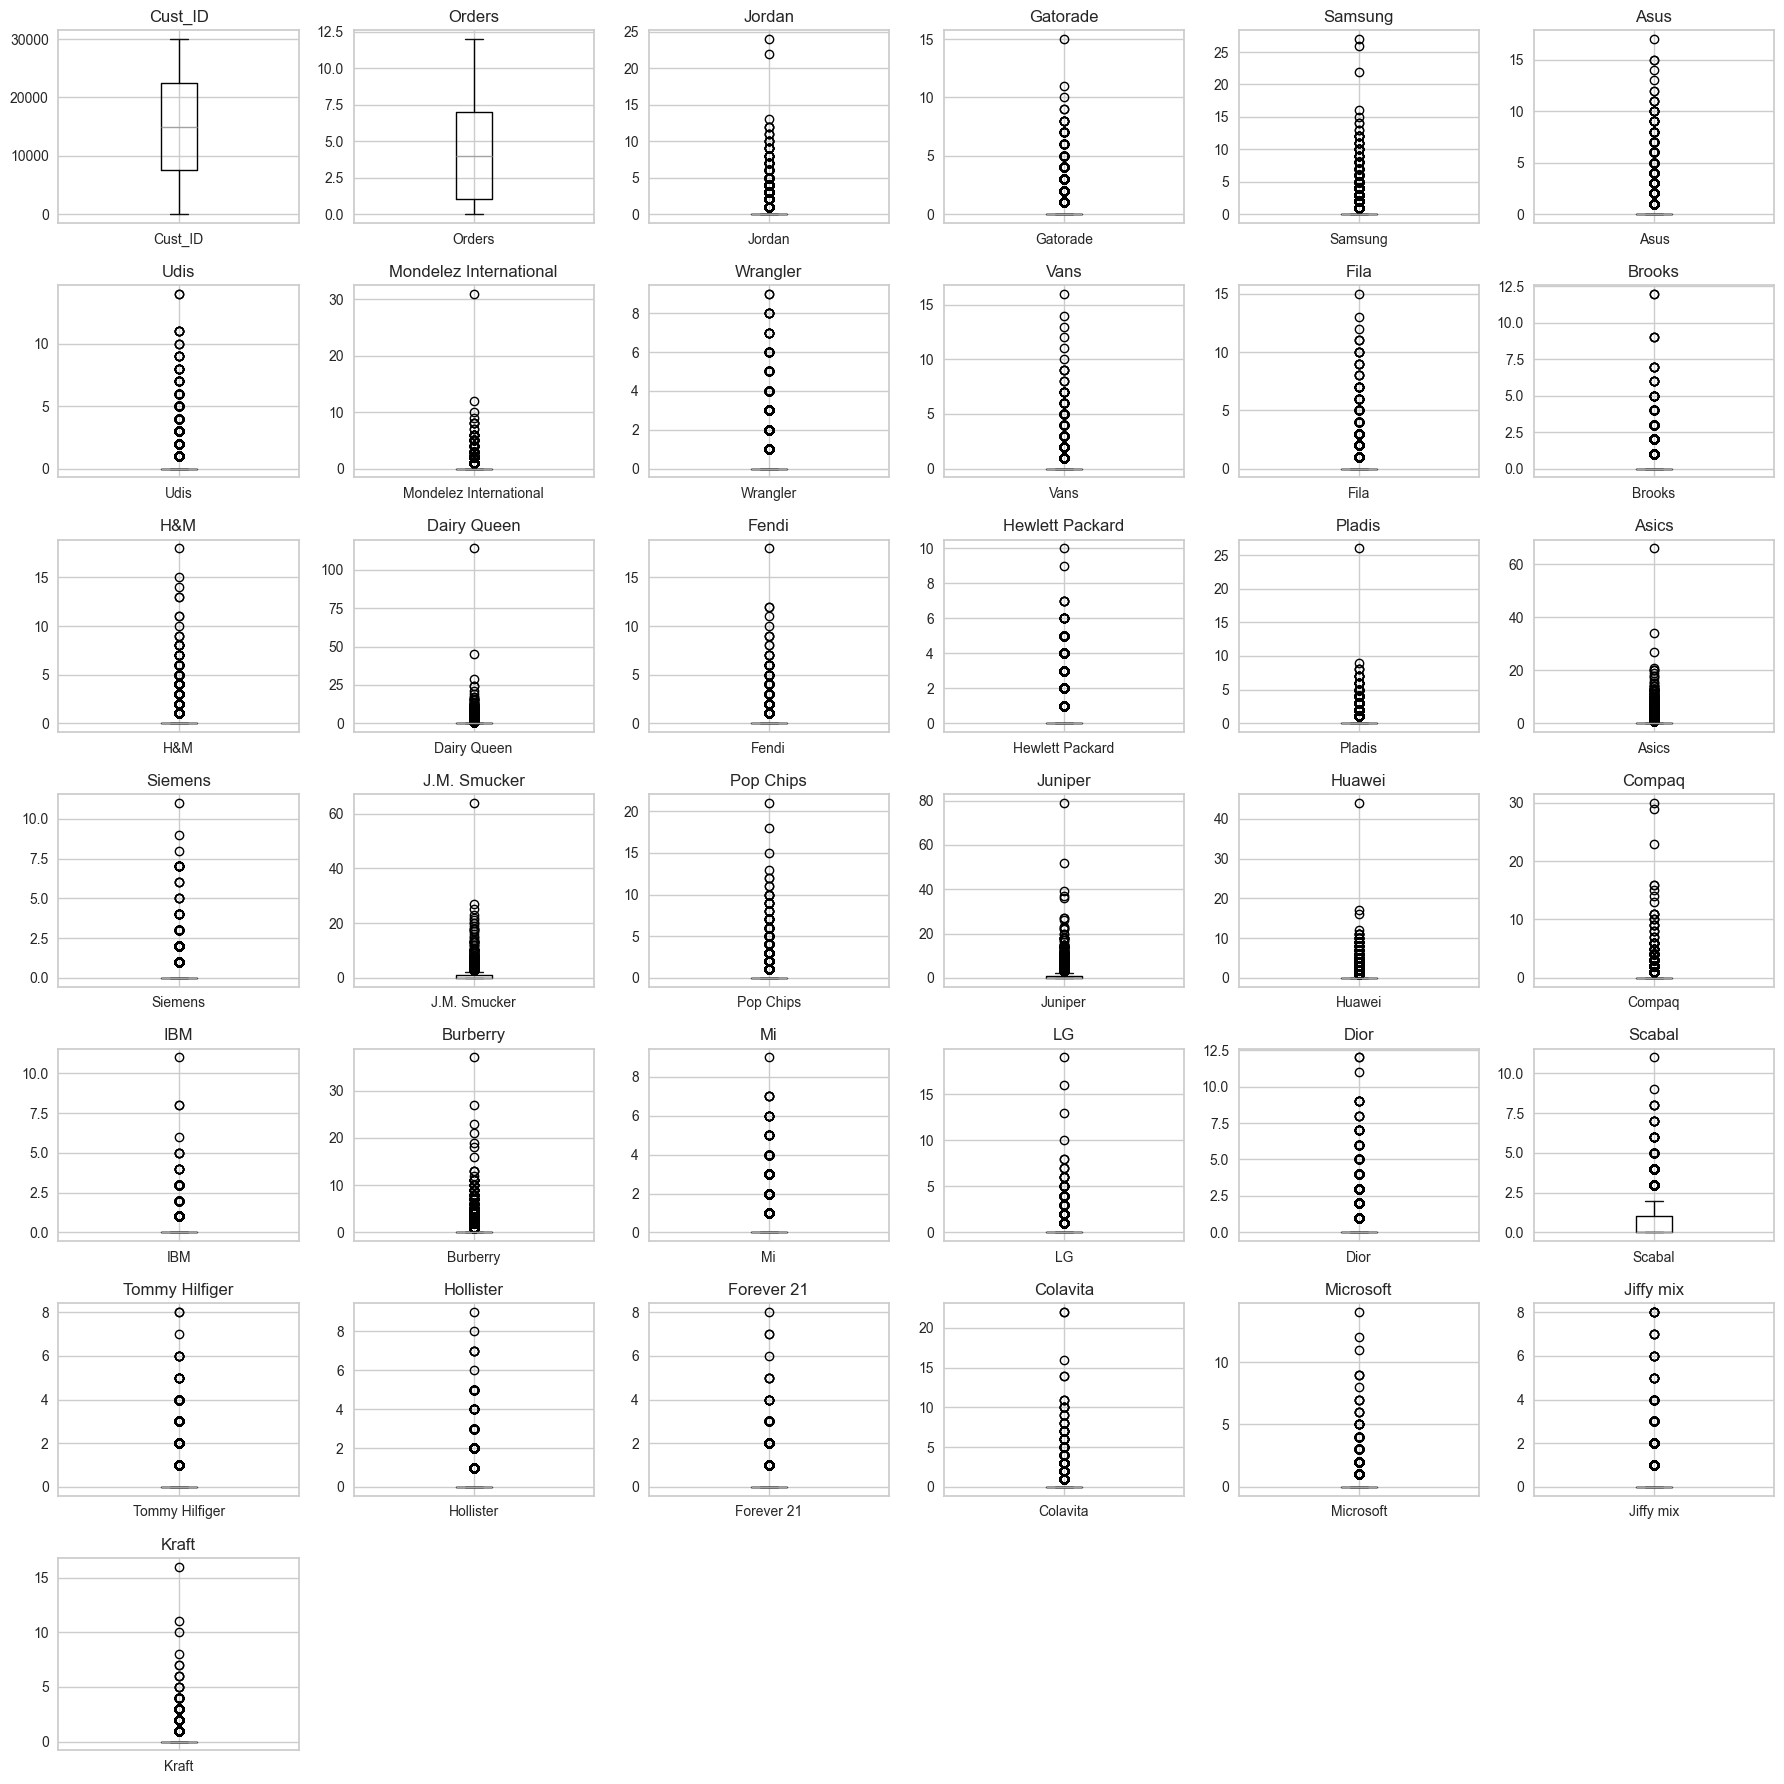

In [35]:
Box_plot(list(col))

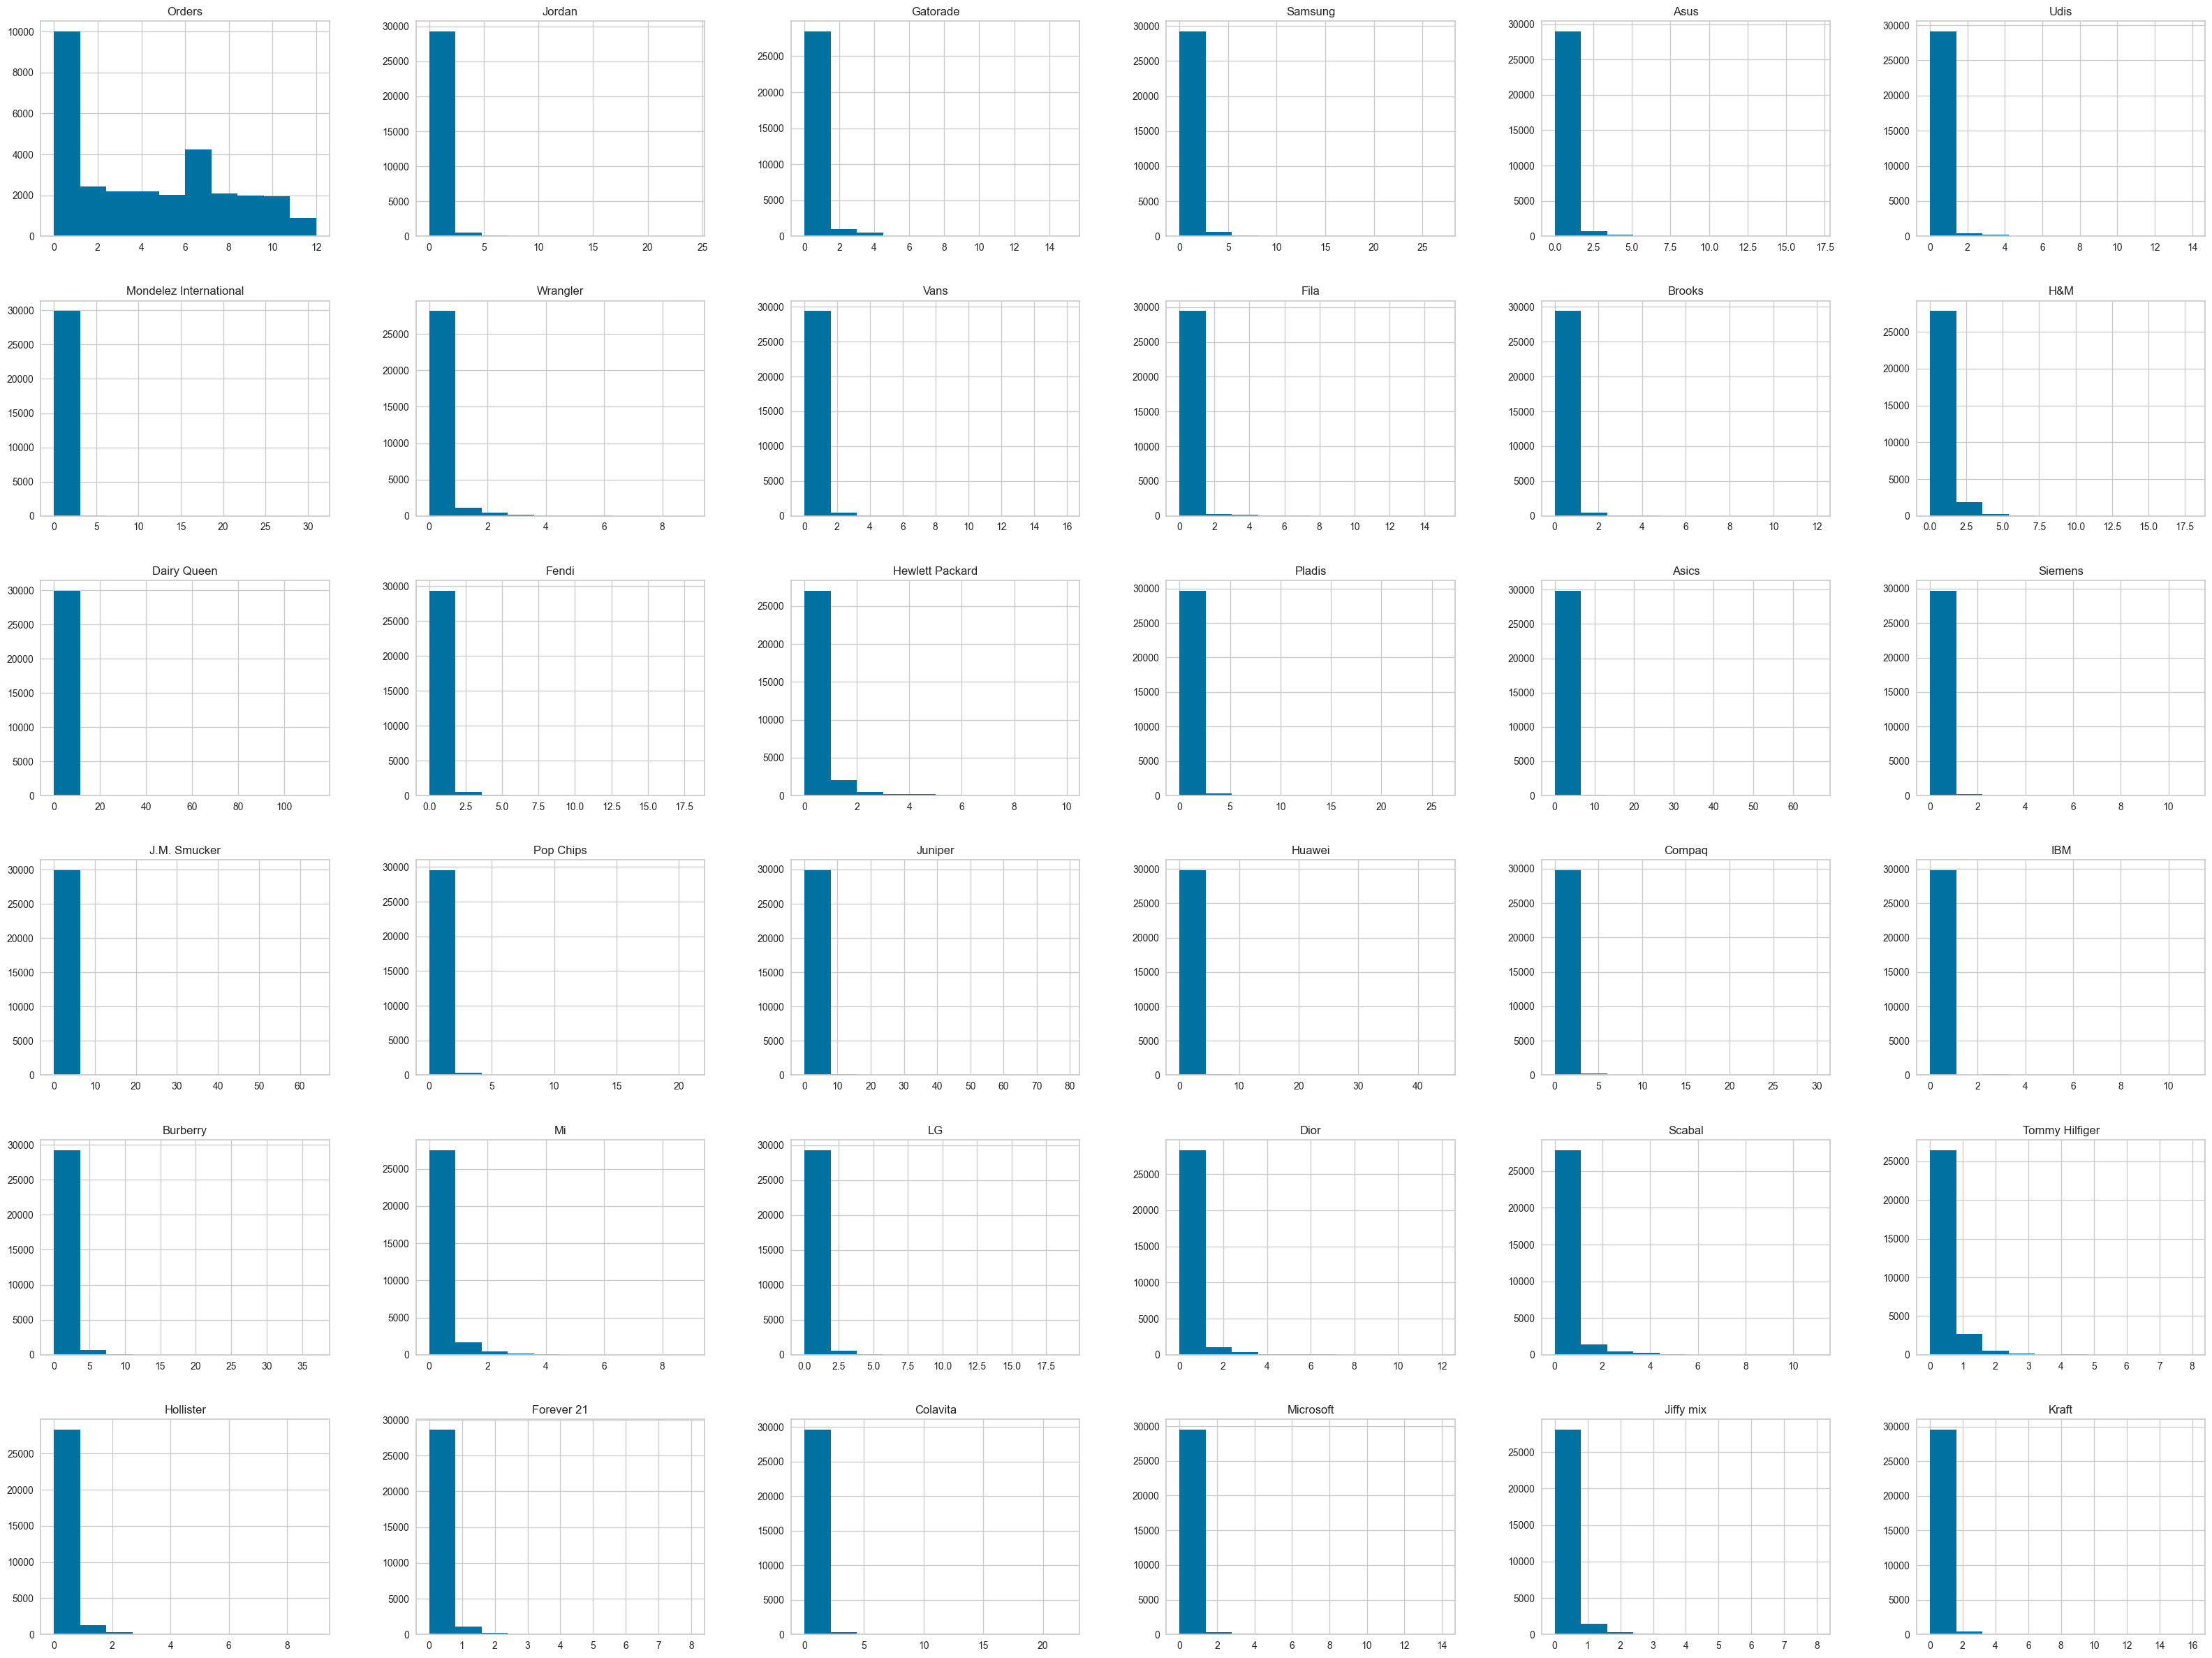

In [36]:
box.iloc[:,1:].hist(figsize=(40,30))
plt.show()

In [37]:
DATAFRAME=box
DATAFRAME.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [38]:
DATAFRAME.isnull().sum()

Cust_ID                   0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [39]:
features= DATAFRAME.iloc[:,1: ].values
features

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
scale = MinMaxScaler()
x = scale.fit_transform(features)
x

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

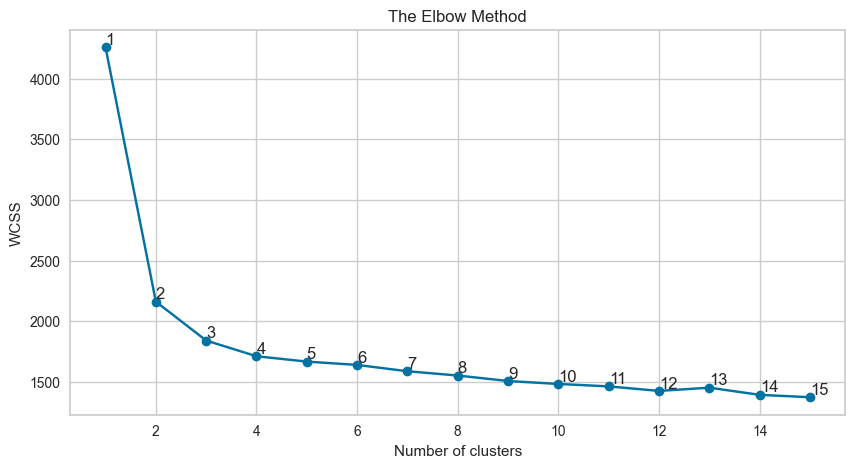

In [41]:
wcss=[]
k_values = range(1, 16)
for i in range(1,16):
    kmeans= KMeans(n_clusters=i)#init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,16), wcss,'bo-')
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
for i, k in enumerate(k_values):
    plt.text(k, wcss[i], str(k), ha='left', va='bottom')
plt.show()

In [42]:
wcss

[4257.854829903177,
 2161.780171829231,
 1841.1481877518263,
 1711.676039593033,
 1667.6319640987667,
 1640.2179458617102,
 1588.0197477862644,
 1552.7698831108792,
 1507.5503545952747,
 1483.3569721376025,
 1463.259387637083,
 1426.0771671181737,
 1452.7324820551303,
 1393.550411160939,
 1374.0616500881079]

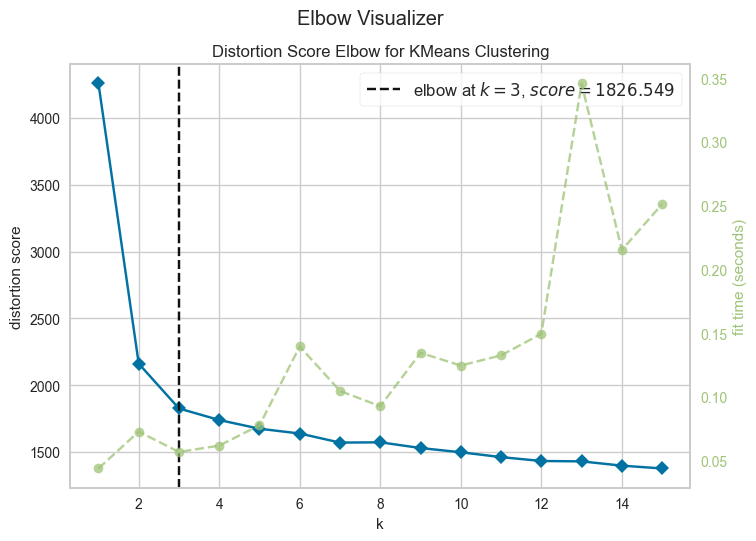

In [43]:
# Kelbow visualizer
k_values = range(1, 16)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(x)
plt.suptitle("Elbow Visualizer")
visualize.show()
plt.show()

In [44]:
silhouette_avg = []
for i in range(2,16):
    # initialise kmeans
    kmeans = KMeans(n_clusters= i)
    cluster_labels = kmeans.fit_predict(x)
    # silhouette score
    silhouette_avg.append(silhouette_score(x,cluster_labels))

In [45]:
silhouette_avg

[0.4322911388133001,
 0.2926824214520362,
 0.22929625131959078,
 0.20735492319122883,
 0.23514483565403568,
 0.22520677687281931,
 0.1716703991299554,
 0.17712306781211276,
 0.13988644426801766,
 0.15411947633561798,
 0.16848694322386368,
 0.14831191268155688,
 0.11122786145911734,
 0.14717969051395072]

C:\Users\Aishwarya MMPL\AppData\Local\Temp\ipykernel_8504\3597445339.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bX-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(silhouette_avg,'bX-',color="red")


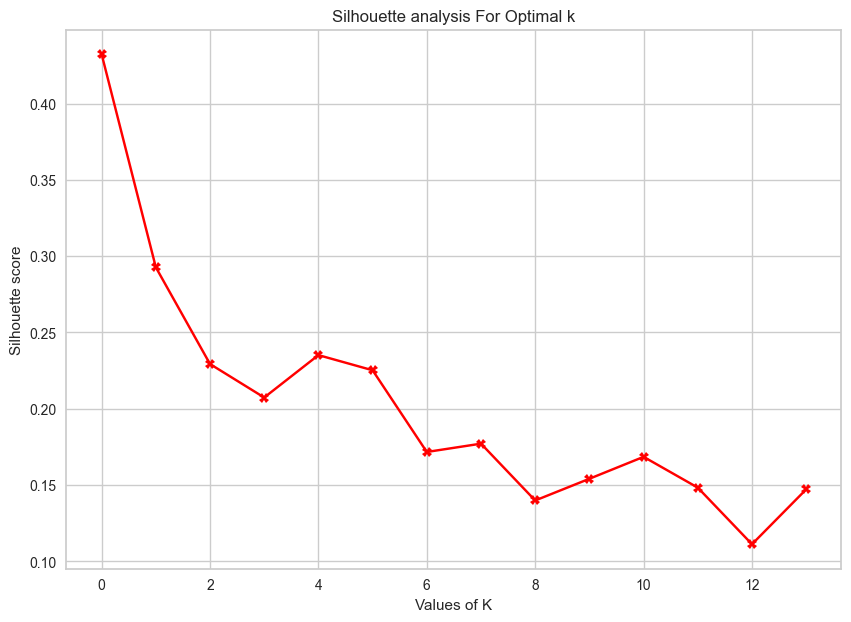

In [46]:
plt.figure(figsize=(10,7))
plt.plot(silhouette_avg,'bX-',color="red")
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')  
plt.title('Silhouette analysis For Optimal k')
plt.show()

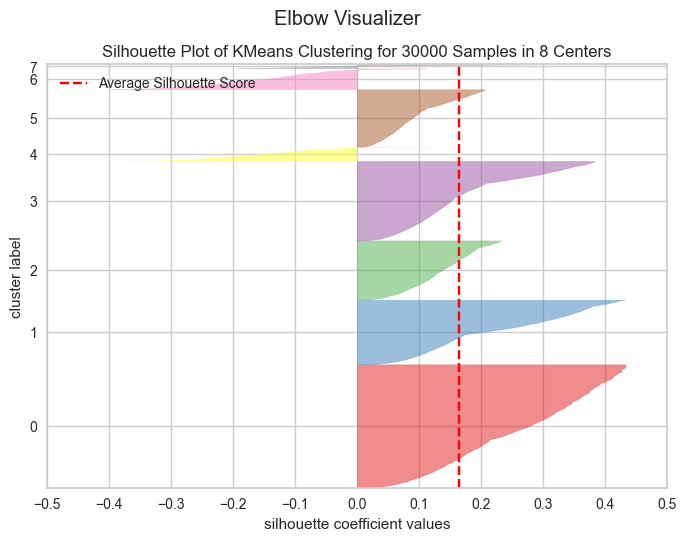

In [51]:
# Kelbow visualizer
k_values = range(1, 16)
kmeans = KMeans()
visualize = SilhouetteVisualizer(kmeans,k=(1,16))
visualize.fit(x)
plt.suptitle("Elbow Visualizer")
visualize.show()
plt.show()

## K-means Model

Taking K value as 3 as per Elbow Method

In [ ]:
kmeans = KMeans(n_clusters = 3)
a=kmeans.fit(x)

In [ ]:
y_means = a.predict(x)

In [ ]:
DATAFRAME.drop("Cluster",axis=1,inplace=True)

In [ ]:
DATAFRAME

In [ ]:
DATAFRAME['Cluster'] = pd.DataFrame(y_means)
DATAFRAME

In [ ]:
DATAFRAME['Cluster'].value_counts()

In [ ]:
# DATAFRAME.to_csv("CLUSTER_DATA",index=False)

# Analyzing Clusters

In [100]:
final = pd.read_csv('Cluster_data')
final.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


## Cluster Size Analysis

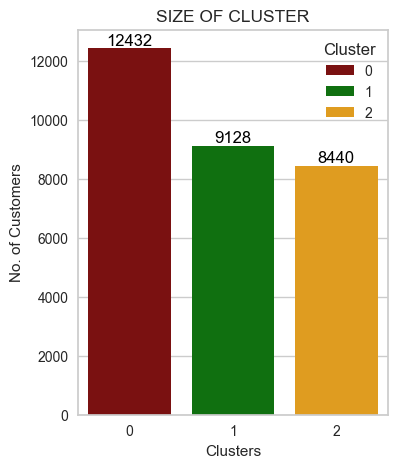

In [102]:
plt.figure(figsize=(4,5))
sns.countplot(data= final, x = 'Cluster', palette=['darkred',"green","orange"],hue="Cluster")
plt.title('SIZE OF CLUSTER', fontsize = 12.5)
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')
cluster=final.Cluster.value_counts().sort_index(ascending=True)
for i, count in enumerate(cluster):
    plt.text(i, count, str(count), va='bottom',ha='center', color='black')

Total search catagory by gender

In [103]:
Gender= df["Gender"]

In [104]:
final["Gender"] = Gender

In [105]:
final['Total Search'] = final.iloc[:,2:37].sum(axis=1)
final

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Gender,Total Search
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,M,2
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,F,18
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,M,5
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,F,2
4,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Unspecified,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1
29996,29997,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1
29997,29998,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,M,2
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1


In [130]:
Overall_cluster= final.groupby(["Cluster"],as_index=False).sum()
Overall_cluster.drop("Gender",axis=1,inplace=True)

In [131]:
Overall_cluster

,Cluster,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,182944741,7560,3071,2724,2521,1825,1707,1642,1283,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
1,1,139225430,79885,2508,2495,2121,1579,1359,1296,978,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,127844829,37649,2444,2351,2046,1436,1240,1255,947,...,2285,3196,1313,705,504,1629,1058,775,601,60093


## Analyzing Cluster 0

In [111]:
clusters_0= final.groupby(['Cluster',"Gender"],as_index=False).sum().query('Cluster == 0')
clusters_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,134763084,5639,2288,1771,1913,1707,1513,1344,...,2700,3801,1583,744,567,1720,1055,787,677,63857
1,0,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787
2,0,Unspecified,19936273,630,182,176,173,106,119,136,...,341,393,224,103,87,240,98,83,99,6833


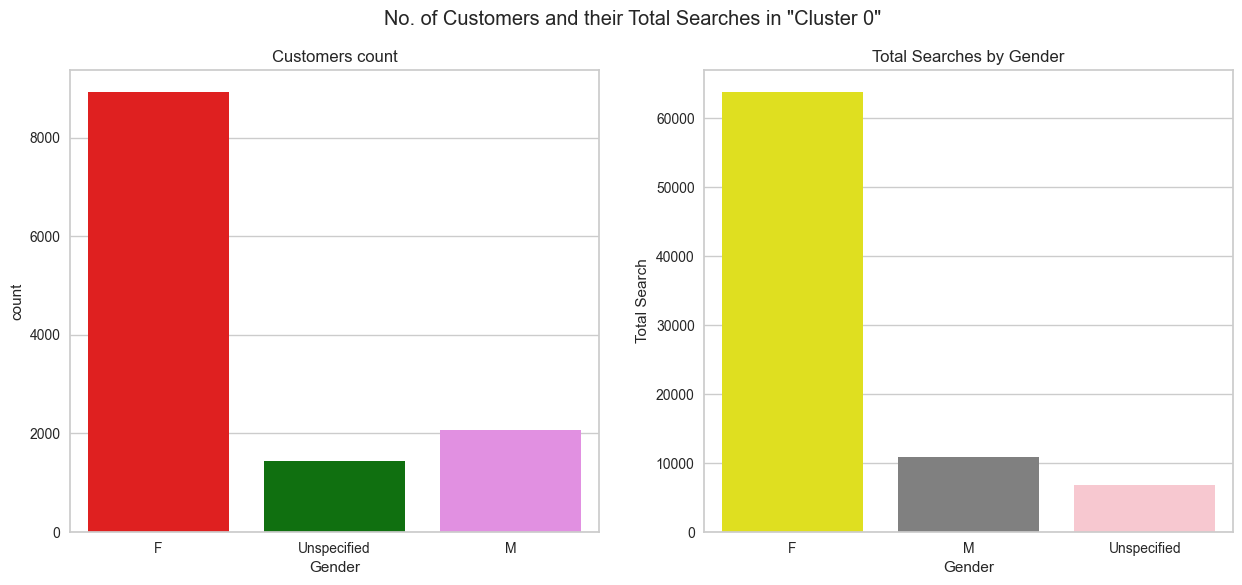

In [125]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=final.query('Cluster == 0'),x='Gender',palette=['red',"green","violet"],hue="Gender")
plt.title('Customers count')
plt.subplot(1,2,2)
sns.barplot(data=clusters_0,x='Gender',y='Total Search',palette=['yellow',"gray","pink"],hue="Gender")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 0"')
plt.show()

## Analyzing Cluster 1

In [121]:
clusters_1= final.groupby(['Cluster',"Gender"],as_index=False).sum().query('Cluster == 1')
clusters_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
3,1,F,106103730,59684,1831,1573,1627,1499,1216,1042,...,2055,3192,1225,541,419,1324,853,667,462,51128
4,1,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322
5,1,Unspecified,10398180,5922,151,105,153,66,92,103,...,186,248,97,64,46,141,65,46,48,4123


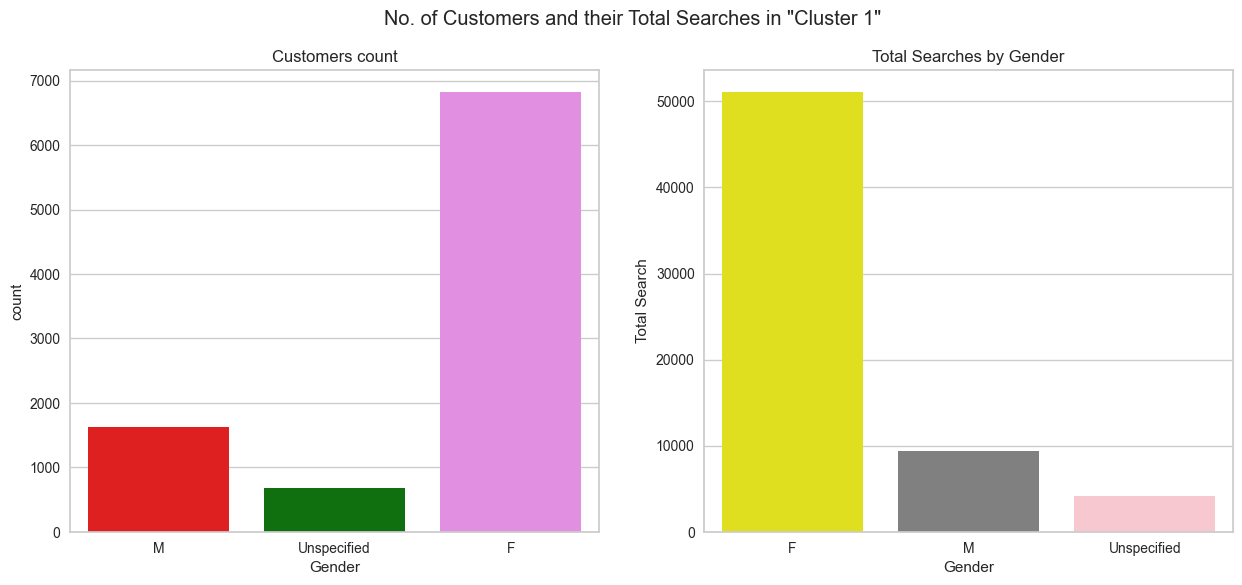

In [126]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=final.query('Cluster == 1'),x='Gender',palette=['red',"green","violet"],hue="Gender")
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=clusters_1,x='Gender',y='Total Search',palette=['yellow',"gray","pink"],hue="Gender")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 1"')
plt.show()

## Analyzing Cluster 2

In [127]:
clusters_2= final.groupby(['Cluster',"Gender"],as_index=False).sum().query('Cluster == 2')
clusters_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
6,2,F,96648546,27990,1785,1482,1568,1341,1113,1031,...,1875,2908,1116,608,439,1235,828,624,455,47783
7,2,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543
8,2,Unspecified,9821830,2765,138,121,157,73,72,77,...,164,184,80,41,24,100,37,41,36,3767


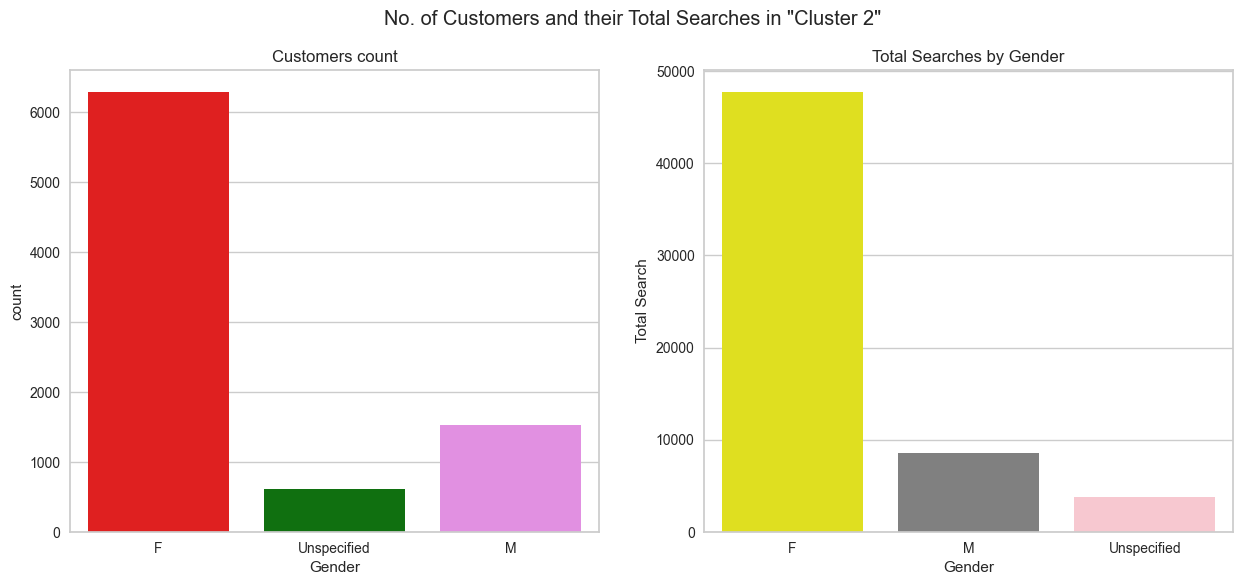

In [128]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=final.query('Cluster == 2'),x='Gender',palette=['red',"green","violet"],hue="Gender")
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=clusters_2,x='Gender',y='Total Search',palette=['yellow',"gray","pink"],hue="Gender")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 2"')
plt.show()

## Total Customers on each Cluster

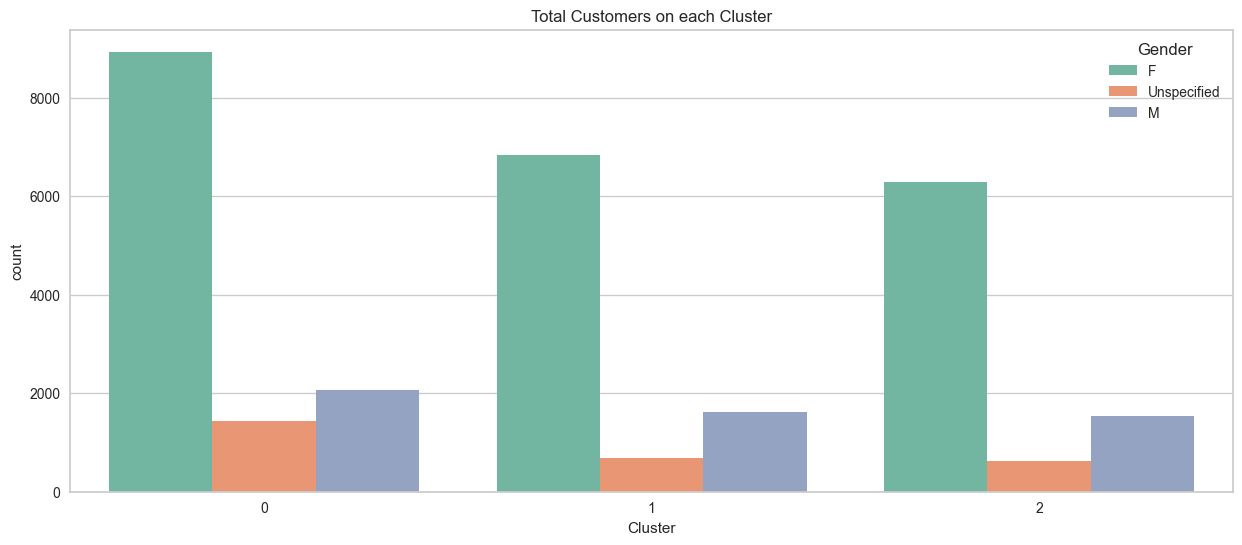

In [155]:
plt.figure(figsize=(15,6))
sns.countplot(data=final,x='Cluster',hue='Gender',palette="Set2")
plt.title('Total Customers on each Cluster')
plt.show()

C:\Users\Aishwarya MMPL\AppData\Local\Temp\ipykernel_8504\3536437361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final,x='Cluster',y="Total Search",palette="rocket")


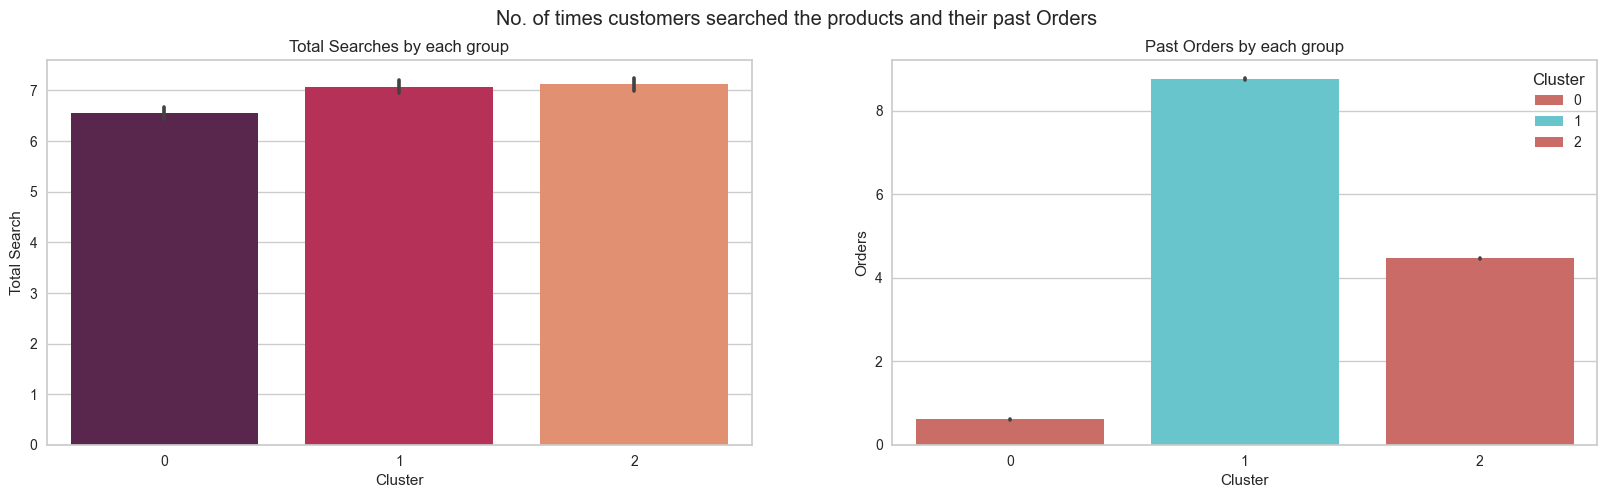

In [169]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(data=final,x='Cluster',y="Total Search",palette="rocket")
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final,x='Cluster',y='Orders',palette="hls",hue="Cluster")
plt.title('Past Orders by each group')
plt.suptitle('No. of times customers searched the products and their past Orders')
plt.show()

# Conclusion

From above Cluster analiyis:


--->   Total number of customer is 30000

       - Cluster 0 has 12432 customers (Very Low past orders but done average searches)
       - Cluster 1 has 9128 customers (Very High past orders and most searches)
       - Cluster 2 has 8440 customers (Average past orders and high searches)

We can use **cluster 1** for brand search analysis which hold highest brand searches

In E-commerce customer segmentation the k-Means clustering plays major role for identifying the purchase pattern based on customer interest ,Here I used **silhoutte score** for finding an optimal cluster number to predict the right **n_cluster**.
<br>

After that splitting cluster into **cluster 1** is previlge to moderate customer and **cluster 0 and cluster 2** is low-set of interest in purchasing